In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.8/874.8 kB 29.9 MB/s eta 0:00:00


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.7 MB/s eta 0:00:00


In [4]:


from roboflow import Roboflow
rf = Roboflow(api_key="1BbLUMOGpdntJECy2")
project = rf.workspace("imran-riaz-chohan").project("kidney-tumor-detection-kgqy9")
version = project.version(1)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dependency ultralytics==8.0.196 is required but found version=8.2.102, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Kidney-Tumor-Detection-1 in yolov8:: 100%|██████████| 8210/8210 [00:01<00:00, 7382.30it/s]


In [5]:
from ultralytics import YOLO

In [6]:
import os

# Define the paths to the train, test, and valid directories
train_dir = '/kaggle/working/Kidney-Tumor-Detection-1/train'
test_dir = '/kaggle/working/Kidney-Tumor-Detection-1/test'
valid_dir = '/kaggle/working/Kidney-Tumor-Detection-1/valid'

# Function to count images in a directory
def count_images(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

# Count images in each directory
train_images = count_images(train_dir)
test_images = count_images(test_dir)
valid_images = count_images(valid_dir)

# Print the results
print(f"Total images in Train set: {train_images}")
print(f"Total images in Test set: {test_images}")
print(f"Total images in Valid set: {valid_images}")

Total images in Train set: 7578
Total images in Test set: 322
Total images in Valid set: 298


In [7]:
import yaml


# Load the YAML file
yaml_file_path = '/kaggle/working/Kidney-Tumor-Detection-1/data.yaml'  # Example YAML file path

# Define the paths to your dataset directories
train_dir = '/kaggle/working/Kidney-Tumor-Detection-1/train'
test_dir = '/kaggle/working/Kidney-Tumor-Detection-1/test'
valid_dir = '/kaggle/working/Kidney-Tumor-Detection-1/valid'

# Read the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.safe_load(file)

# Update the paths in the YAML file (ensure the keys match your YAML file's structure)
yaml_content['train'] = train_dir
yaml_content['test'] = test_dir
yaml_content['val'] = valid_dir  # If you have validation images

# Write the updated paths back to the YAML file
with open(yaml_file_path, 'w') as file:
    yaml.dump(yaml_content, file)

print(f"Updated YAML file paths for train, test, and valid images.")


Updated YAML file paths for train, test, and valid images.


In [8]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12345)

In [9]:
model = YOLO("yolov8n")

100%|██████████| 6.25M/6.25M [00:00<00:00, 158MB/s]


In [11]:
results = model.train(
    data="/kaggle/working/Kidney-Tumor-Detection-1/data.yaml",  # Path to your dataset config
    epochs=50,  # Increase epochs for deeper training
    project='kidney_tumor_detection',  # Updated project name
    name='kidney_tumor_detection_project',  # Updated run name
    save_period=5,  # Save checkpoints every 5 epochs
    batch=16,  # Larger batch size for faster training (adjust based on GPU memory)
    patience=10,  # Early stopping if no improvement for 10 epochs
    optimizer='Adam',  # Use Adam optimizer for better convergenc
    augment=True  # Apply augmentations for better generalization
)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Kidney-Tumor-Detection-1/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=kidney_tumor_detection, name=kidney_tumor_detection_project2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/Kidney-Tumor-Detection-1/train/labels... 3789 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3789/3789 [00:04<00:00, 852.21it/s]


train: New cache created: /kaggle/working/Kidney-Tumor-Detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Kidney-Tumor-Detection-1/valid/labels... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<00:00, 691.22it/s]

val: New cache created: /kaggle/working/Kidney-Tumor-Detection-1/valid/labels.cache


Plotting labels to kidney_tumor_detection/kidney_tumor_detection_project2/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to kidney_tumor_detection/kidney_tumor_detection_project2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.37G      1.225      1.437      1.201         59        640: 100%|██████████| 237/237 [00:47<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        149        420      0.618      0.545       0.53      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.31G      1.202      1.067        1.2         63        640: 100%|██████████| 237/237 [00:44<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]

                   all        149        420      0.791      0.715      0.769      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.32G      1.155     0.9767      1.186         46        640: 100%|██████████| 237/237 [00:44<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]

                   all        149        420      0.813       0.78      0.844      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G      1.115     0.8979      1.161         61        640: 100%|██████████| 237/237 [00:44<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.83it/s]

                   all        149        420      0.856      0.769      0.879      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.31G      1.093     0.8594      1.156         43        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]

                   all        149        420      0.872      0.829      0.909      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.31G      1.068     0.8019      1.139         81        640: 100%|██████████| 237/237 [00:44<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]

                   all        149        420      0.901      0.833      0.903      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.32G      1.045     0.7753      1.132         62        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        149        420      0.907       0.81      0.902       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.32G       1.05     0.7657      1.131         48        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]

                   all        149        420      0.822      0.837      0.874      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.31G      1.032     0.7429      1.118         73        640: 100%|██████████| 237/237 [00:43<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all        149        420      0.924      0.873      0.936      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.31G      1.022     0.7217      1.109         51        640: 100%|██████████| 237/237 [00:43<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.79it/s]

                   all        149        420      0.909      0.811       0.91      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.32G      1.006     0.7046      1.099         49        640: 100%|██████████| 237/237 [00:44<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all        149        420      0.926      0.823      0.909      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G     0.9953     0.6968      1.095         42        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.83it/s]

                   all        149        420      0.929      0.861      0.928      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.31G     0.9944     0.6801      1.091         87        640: 100%|██████████| 237/237 [00:44<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]

                   all        149        420      0.923      0.867      0.934      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.31G     0.9787     0.6666      1.086         46        640: 100%|██████████| 237/237 [00:43<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        149        420      0.876      0.884      0.937      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.32G     0.9839     0.6566      1.084         56        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all        149        420      0.912      0.879      0.938      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.32G      0.979     0.6568      1.087         52        640: 100%|██████████| 237/237 [00:44<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.87it/s]

                   all        149        420      0.902      0.895      0.937      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.31G     0.9654      0.642      1.081         63        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.49it/s]

                   all        149        420      0.926      0.803      0.919      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.31G     0.9723     0.6373      1.078         56        640: 100%|██████████| 237/237 [00:44<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        149        420      0.907      0.899      0.945      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.32G     0.9564     0.6179      1.073         37        640: 100%|██████████| 237/237 [00:43<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]

                   all        149        420      0.919      0.875      0.942      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G     0.9535     0.6104      1.069         60        640: 100%|██████████| 237/237 [00:44<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all        149        420      0.902       0.88      0.938      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.31G      0.952     0.6048      1.075         51        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

                   all        149        420      0.902      0.902       0.94      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.31G     0.9475     0.5999      1.067         66        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all        149        420      0.904      0.862      0.939       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.32G     0.9414      0.591       1.06         58        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all        149        420       0.89      0.895      0.937      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.32G     0.9467     0.6021      1.071         60        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]

                   all        149        420      0.909      0.888      0.943      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.31G     0.9333     0.5794      1.056         74        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

                   all        149        420       0.91      0.906      0.945      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.31G     0.9297     0.5828      1.058         48        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.83it/s]

                   all        149        420      0.906      0.893      0.942      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.32G     0.9332     0.5831      1.056         57        640: 100%|██████████| 237/237 [00:44<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]

                   all        149        420      0.904      0.896       0.94      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.32G     0.9267      0.579      1.057         60        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.76it/s]

                   all        149        420      0.917      0.922      0.945      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.31G     0.9113     0.5607      1.044         52        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all        149        420      0.897       0.91      0.946      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.31G     0.9137     0.5493      1.045         58        640: 100%|██████████| 237/237 [00:43<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        149        420      0.937      0.888      0.948      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.32G     0.9059      0.544      1.042         50        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]

                   all        149        420      0.925      0.903      0.949      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.32G     0.9089     0.5428      1.042         60        640: 100%|██████████| 237/237 [00:44<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]

                   all        149        420      0.886      0.912      0.945      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.31G     0.8974     0.5344      1.044         63        640: 100%|██████████| 237/237 [00:43<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.76it/s]

                   all        149        420      0.928      0.918      0.958      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.31G     0.8922     0.5257      1.031         65        640: 100%|██████████| 237/237 [00:44<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]

                   all        149        420      0.934      0.902      0.952      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.32G      0.909     0.5193      1.038         56        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]

                   all        149        420      0.912      0.925      0.949      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.32G     0.8812     0.5134      1.029         46        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]

                   all        149        420      0.937       0.89      0.954      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.31G     0.8873     0.5059      1.026         71        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.83it/s]

                   all        149        420      0.918       0.94      0.952      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.31G     0.8765     0.5022      1.024         43        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

                   all        149        420      0.942      0.904      0.957      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.32G     0.8749     0.4922      1.022         56        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]

                   all        149        420      0.908       0.93      0.954      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.32G     0.8738     0.4922      1.021         60        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all        149        420      0.915      0.919      0.955      0.685


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.31G     0.8618     0.4386      1.056         45        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all        149        420       0.93      0.923      0.953      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.31G     0.8555     0.4272      1.054         38        640: 100%|██████████| 237/237 [00:42<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]

                   all        149        420      0.933      0.909      0.953      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.32G     0.8511     0.4186       1.05         37        640: 100%|██████████| 237/237 [00:42<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.80it/s]

                   all        149        420       0.93      0.927      0.954        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G     0.8402     0.4098      1.038         40        640: 100%|██████████| 237/237 [00:42<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        149        420      0.929      0.926      0.948      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.31G     0.8288     0.3986      1.031         42        640: 100%|██████████| 237/237 [00:42<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

                   all        149        420      0.922      0.926       0.96      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.31G     0.8246      0.386      1.028         37        640: 100%|██████████| 237/237 [00:42<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.79it/s]

                   all        149        420      0.957      0.903      0.961      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G     0.8185      0.383      1.023         44        640: 100%|██████████| 237/237 [00:42<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all        149        420       0.93      0.946      0.959      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G     0.8048     0.3717      1.014         35        640: 100%|██████████| 237/237 [00:42<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]

                   all        149        420      0.933      0.944      0.957      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.31G      0.802     0.3661      1.012         38        640: 100%|██████████| 237/237 [00:42<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.91it/s]

                   all        149        420       0.93      0.935      0.954       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.31G     0.7957     0.3575      1.006         40        640: 100%|██████████| 237/237 [00:42<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.93it/s]

                   all        149        420      0.929       0.94       0.96      0.714



50 epochs completed in 0.637 hours.
Optimizer stripped from kidney_tumor_detection/kidney_tumor_detection_project2/weights/last.pt, 6.3MB
Optimizer stripped from kidney_tumor_detection/kidney_tumor_detection_project2/weights/best.pt, 6.3MB

Validating kidney_tumor_detection/kidney_tumor_detection_project2/weights/best.pt...
Ultralytics YOLOv8.2.102 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


                   all        149        420      0.921      0.942      0.957      0.701
                Kidney        149        271      0.924      0.978      0.982      0.819
                 Tumor         88        149      0.918      0.906      0.933      0.583
Speed: 0.2ms preprocess, 7.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to kidney_tumor_detection/kidney_tumor_detection_project2


lr/pg0,█▅▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆██▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▅▆▇▇▇█▇▇▇███▇██████████████████████████
metrics/mAP50-95(B),▁▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████▇███████
metrics/precision(B),▁▅▅▆▆▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇█▇▇█▇█▇▇▇▇█▇▇█▇▇▇
metrics/recall(B),▁▄▅▅▆▆▆▇▆▇▇▇▇▆▇▇▇▇▇▇▇█▇▇▇█▇█▇████▇██▇███
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▆▆▅▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁


In [12]:
best_model = model.save('/kaggle/working/kidney_tumor_detection/kidney_tumor_detection_project2/weights/best.pt')

In [13]:

import cv2
import matplotlib.pyplot as plt





In [14]:
model = YOLO('/kaggle/working/kidney_tumor_detection/kidney_tumor_detection_project2/weights/best.pt')

In [15]:
# Function to annotate a given image
def annotate_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Perform inference on the image
    results = model(img)
    
    # Annotate the image (bounding boxes, labels, etc.)
    annotated_img = results[0].plot()  # 'results[0]' contains predictions for the image
    
    # Display the image with annotations
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # Save the annotated image (optional)
    cv2.imwrite("annotated_image.jpg", annotated_img)
    print("Annotated image saved as 'annotated_image.jpg'")


0: 640x640 2 Kidneys, 6.5ms
Speed: 3.1ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


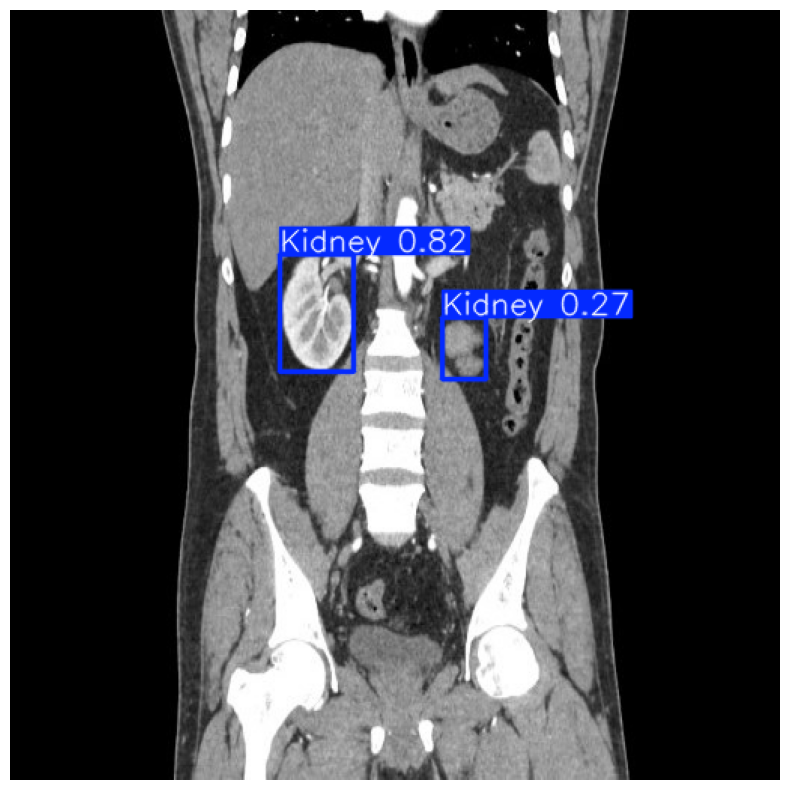

Annotated image saved as 'annotated_image.jpg'


In [16]:
# Test the function with any random image
annotate_image('/kaggle/input/check-data/kidney_normal_0012.jpg')


0: 640x640 2 Kidneys, 2 Tumors, 8.3ms
Speed: 4.0ms preprocess, 8.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


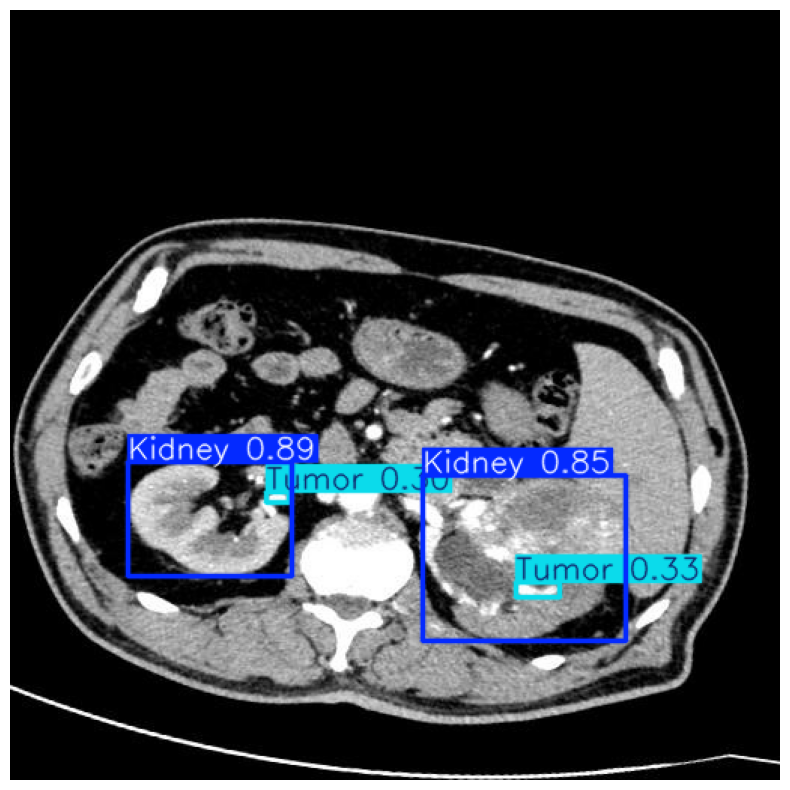

Annotated image saved as 'annotated_image.jpg'


In [19]:
annotate_image('/kaggle/input/tumor-kidney/kidney_tumor_0249.jpg')


0: 640x640 1 Kidney, 9.0ms
Speed: 3.6ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


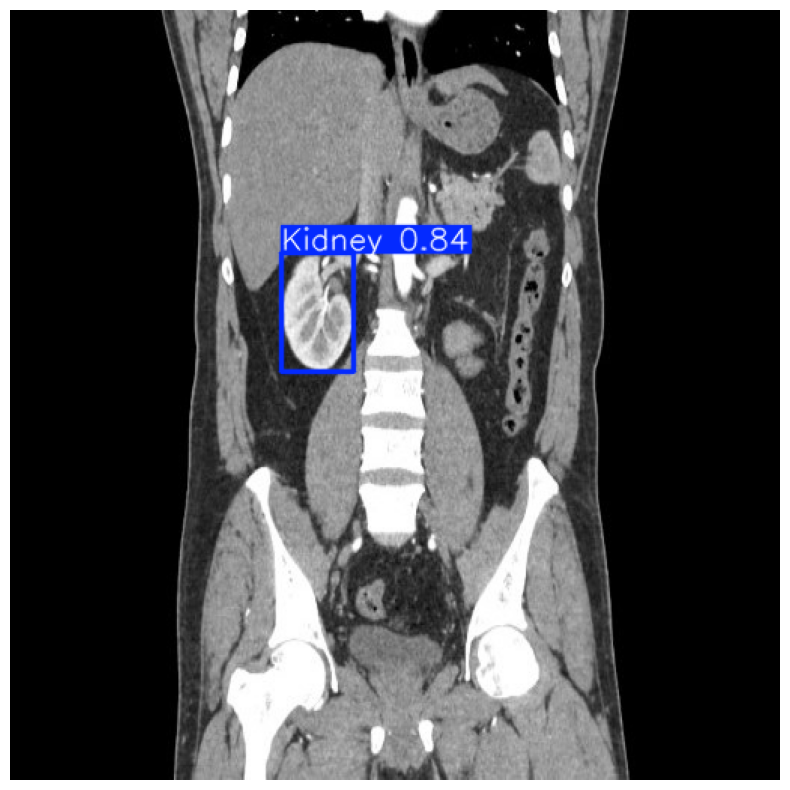

Annotated image saved as 'annotated_image.jpg'


In [22]:
annotate_image('/kaggle/input/check-data/kidney_normal_0012.jpg')


0: 640x640 2 Kidneys, 3 Tumors, 7.8ms
Speed: 2.9ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


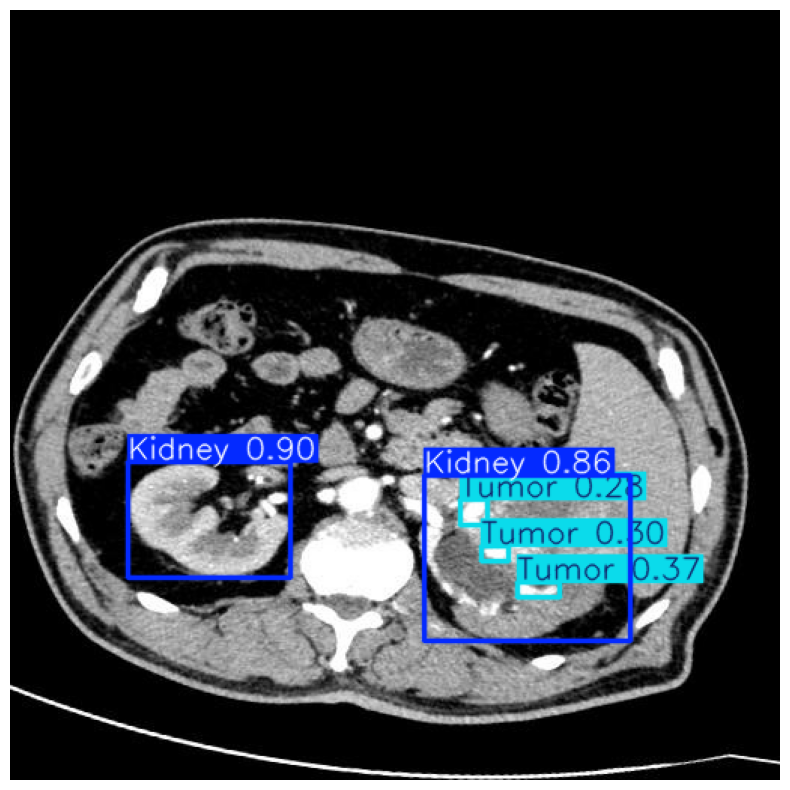

Annotated image saved as 'annotated_image.jpg'


In [24]:
annotate_image('/kaggle/input/tumor-kidney/kidney_tumor_0249.jpg')

In [ ]:
def calculate_volume(width, height, depth):
    # Assuming depth is the average of width and height for a rough estimate
    depth = (width + height) / 2
    # Calculate volume (in cubic pixels)
    volume = width * height * depth
    # Convert to cubic centimeters (assuming 1 pixel = 0.1 cm, adjust as needed)
    volume_cm3 = volume * (0.1 ** 3)
    return volume_cm3


In [ ]:

def annotate_image1(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Perform inference on the image
    results = model(img)
    
    # Get the original image from the results
    orig_img = results[0].orig_img
    
    # Iterate through the detected objects
    for result in results[0].boxes.data:
        x1, y1, x2, y2, conf, cls = result
        
        # Calculate width and height of the bounding box
        width = x2 - x1
        height = y2 - y1
        
        # Determine class (0 for kidney, 1 for tumor - adjust if your classes are different)
        class_id = int(cls.item())
        class_name = "Kidney" if class_id == 0 else "Tumor"
        
        # Set color (green for kidney, red for tumor)
        color = (255, 0, 0) if class_id == 0 else (0, 0, 255)
        
        # Draw bounding box
        cv2.rectangle(orig_img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        
        # Prepare label
        if class_id == 1:  # Tumor
            volume = calculate_volume(width, height, None)
            label = f"{class_name} V:{volume:.2f}cm^3"
        else:
            label = class_name
        
        # Put label on the image
        cv2.putText(orig_img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Display the image with annotations
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # Save the annotated image (optional)
    cv2.imwrite("annotated_image_kidney_and_tumor.jpg", orig_img)
    print("Annotated image saved as 'annotated_image_kidney_and_tumor.jpg'")